Dataset Shape: (442, 11)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Baseline Model Performance: {'MAE': 44.053033707865175, 'RMSE': np.float64(54.332408273184846), 'R2': 0.4428225673999313}
Best Parameters from Random Search:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Random Search Model Perform

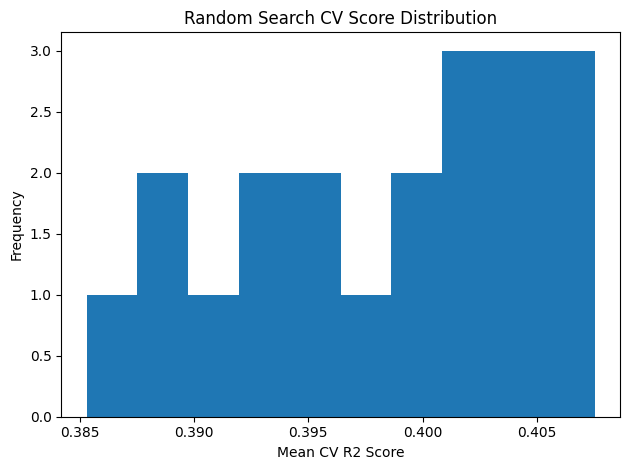

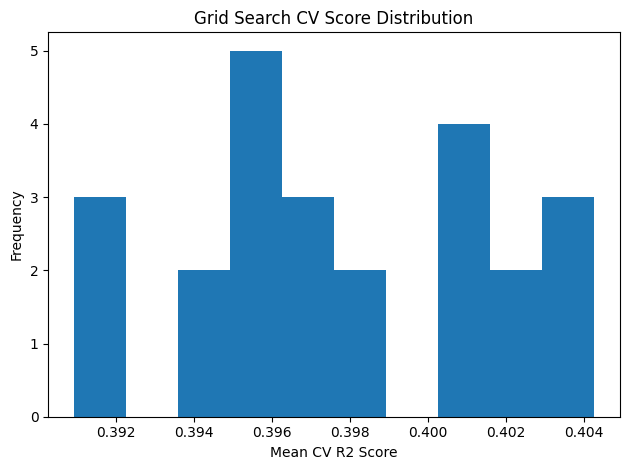


Final Model Comparison:

                        MAE       RMSE        R2
Baseline RF       44.053034  54.332408  0.442823
Random Search RF  43.776150  54.135266  0.446859
Grid Search RF    43.974550  54.245563  0.444602


In [1]:
# Fine-Tuning Machine Learning Regressors for Optimal Hyperparameter Selection
# ----------------------------------------------------------------------
#  Hyperparameter Tuning using Grid Search and Random Search
# ----------------------------------------------------------------------

# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------------------------------------------------
# 2. Load Dataset
# ----------------------------------------------------------------------
data = load_diabetes(as_frame=True)
df = data.frame

X = df.drop(columns='target')
y = df['target']

print("Dataset Shape:", df.shape)
print(df.head())

# ----------------------------------------------------------------------
# 3. Train-Test Split
# ----------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------------------------------------
# 4. Baseline Model (Random Forest)
# ----------------------------------------------------------------------
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

baseline_results = evaluate_model(baseline_model, X_test, y_test)
print("Baseline Model Performance:", baseline_results)

# ----------------------------------------------------------------------
# 5. Hyperparameter Tuning – Randomized Search
# ----------------------------------------------------------------------
random_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=random_param_grid,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters from Random Search:")
print(random_search.best_params_)

random_best_model = random_search.best_estimator_
random_results = evaluate_model(random_best_model, X_test, y_test)
print("Random Search Model Performance:", random_results)

# ----------------------------------------------------------------------
# 6. Hyperparameter Tuning – Grid Search
# ----------------------------------------------------------------------
grid_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=grid_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

grid_best_model = grid_search.best_estimator_
grid_results = evaluate_model(grid_best_model, X_test, y_test)
print("Grid Search Model Performance:", grid_results)

# ----------------------------------------------------------------------
# 7. Visualization – Hyperparameter Search Results
# ----------------------------------------------------------------------
# Histogram of cross-validation scores (Random Search)
plt.figure()
plt.hist(random_search.cv_results_['mean_test_score'], bins=10)
plt.xlabel('Mean CV R2 Score')
plt.ylabel('Frequency')
plt.title('Random Search CV Score Distribution')
plt.tight_layout()
plt.show()

# Histogram of cross-validation scores (Grid Search)
plt.figure()
plt.hist(grid_search.cv_results_['mean_test_score'], bins=10)
plt.xlabel('Mean CV R2 Score')
plt.ylabel('Frequency')
plt.title('Grid Search CV Score Distribution')
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 8. Final Model Comparison
# ----------------------------------------------------------------------
comparison_df = pd.DataFrame({
    'Baseline RF': baseline_results,
    'Random Search RF': random_results,
    'Grid Search RF': grid_results
}).T

print("\nFinal Model Comparison:\n")
print(comparison_df)

# ----------------------------------------------------------------------
# End
# ----------------------------------------------------------------------
